<a href="https://colab.research.google.com/github/amukund8/AML/blob/main/Copy_of_Mukund_Assign3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Develop a machine learned model to predict, given some feature vectors, if the outcome would be suicide or not, as a binary dependent variable. The binary categories could be "low suicide rate", "high suicide rate". (Note that a different approach could seek to generate a numerical value by solving a regression problem).

A machine learning solution would require us to pre-process the dataset and prepare/design our experimentation.

Load the dataset in your model development framework (Jupyter Notebook) and examine the features. Note that the Kaggle website also has histograms that you can inspect. However, you might want to look at the data grouped by some other features. For example, what does 'number of suicides/100k' histogram look like from country to country.

To answer the following questions, you have to think thoroughly, and possibly attempt some pilot experiemnts. There is no one right or wrong answers to some questions below, but you will always need to work from the data to build a convincing argument for your audience.



**Question 1:** Due to the severity of this real-world crisis, what information would be most important to "machine-learn"? Can it be answered? (Note that this is asking you to define the big picture question that we want to answer from this dataset. This is NOT ASKING YOU TO CONJECTURE WHICH FEATURE IS GOING TO TURN OUT BEING IMPORTANT).

**Answer**:

In order to define the big picture question we are seeking to answer from the dataset, it is important to understand what the dataset is showing first and foremost. From left to right, the data is representing different age groups of both genders across different countries from the years 1985 to 2016. Each of those age groups for male and female across every year have an associated suicide number, population, suicide rate/100k population, human development index number, and GDP associated with it. Based on this data, it is possible to classify these groups (male and female from a country and age group at a certain year) as having a high suicide rate or low suicide rate. This metric is what the machine learning model can learn, based on each group's characteristics/features. Some features may contribute to these classification much more than others, and some may be redundant.  

**Question 2:** Explain in detail how one should set up the problem. Would it be a regression or classification problem? Is any unsupervised approach, to look for patterns, worthwile?

**Answer:**

Since the task at hand requires us to us ML to predict a binary outcome, the problem would require a classification approach. We are not predicted a number, so it would not be regression. In terms of the problem's set up, in our case, it is first is to create a dependent variable, since the task at hands requires this for classification. This can be accomplished by finding the mean of the suicide number/100k population and bin the items greater than or equal to the mean in one category and less than the mean in the other. Next, it is important to also remove unecessary features that express redundnacy, as certain variables represent the same thing. Next, the data preprocessing would be to clean the data by finding and imputing outliers and incorrect/missing values in the data with mean and mode, removing duplicates in the data. Next, the nominal variables would be one hot encoded.  Next, a classifier model would be chosen to evaluate the model's performance.

An unsupervised approach to look for patterns could depend on a k-means score. The higher the kmeans clustering error, the worst the model's ability to cluster naturally. By checking this score, it could be the first step in determining whether an unsupervised approach would be worthwhile. However, because many classifier problems are supervised learning approaches, this is not necessary in our case, since we are choosing a dependent variable to classify.

Steps for the problem:


1.   Load the dataset and create visualizations that aggregate the data based on the country's age group's number of suicides, and suicide rate/100k for male and female with the other the other characteristics (GDP, Population, number of suicide) to get an understanding of how the data is distributed
3.   Create the model's dependent variable by finding the mean of the suicide rate/100k feature. Create an additional binary variable in the dataframe that bins the numerical variable suicide rate/100k into low and high suicide rate categories
3. Create visualizations that show a correlation between the new binary variable against the other features in the dataset
4. Remove the poorly correlated features and the redundant features. Impute missing values and incorrect outlier values based on mean and mode.
5. One-hot encode all nominal variables to create a pre-processsed dataframe.
6. Choose a classifier model and evaluate its performance on the pre-processed data above.








Load the dataset, ensure it is the correct one

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv('master.csv')

# To make sure it's the correct dataset
print(f'Number of rows={len(df)}, Number of columns={len(df.columns)}')

df.head()



Number of rows=27820, Number of columns=12


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Data exploration

In [ ]:
import seaborn as sns;
sns.set(color_codes=True)

df1=df.copy()

df3=df.copy()
# Aggregate over country, year,age group
df3.groupby(['country','year','age']).mean(numeric_only=True)
print(df3.head())

   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 

From the above dataframe, we can see that the dataframe is pretty much the same as the original one, which means that the data is aggregated in groups based on the country, year, and age

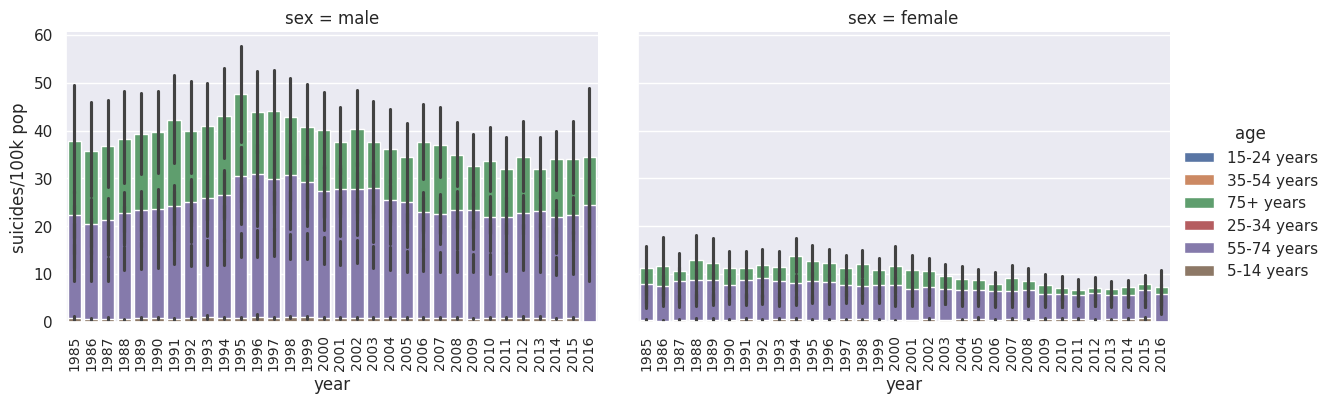

In [ ]:
# Data visualization of aggregation:

a = sns.FacetGrid(df1, col='sex', hue='age',height=4,aspect=1.5)
a.map(sns.barplot,'year','suicides/100k pop',order=np.arange(1985,2017))
a.set_xticklabels(rotation=90, fontsize=10)
a.add_legend();


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


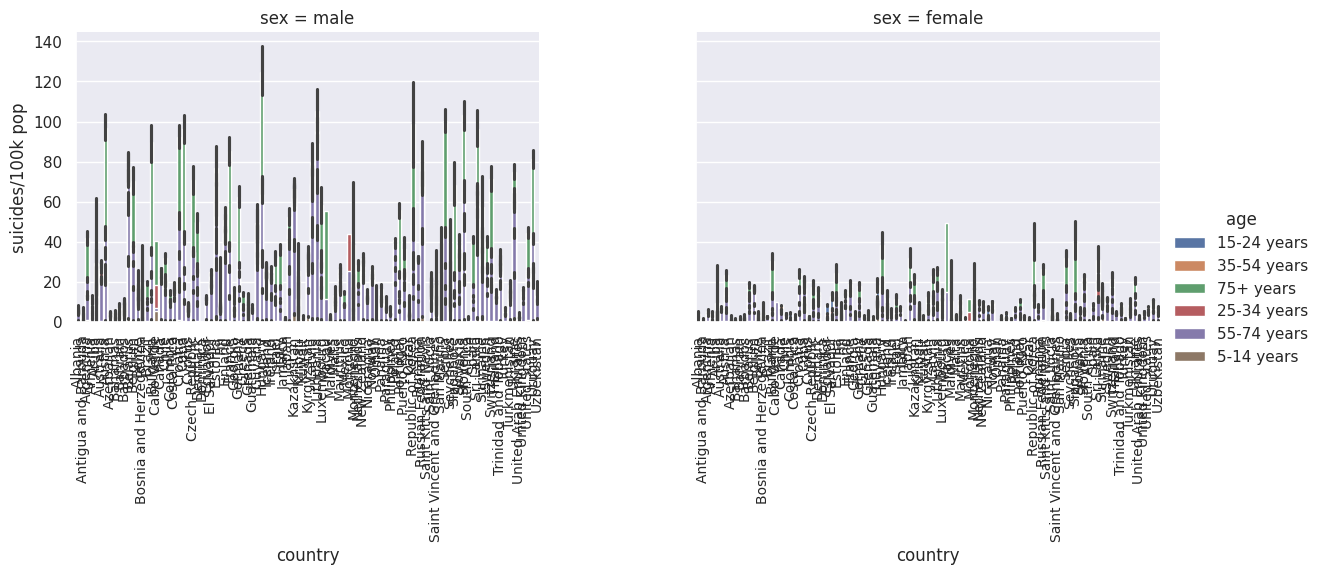

In [ ]:
# Data visualization of country vs number of suicide rates for the different age groups:

a = sns.FacetGrid(df1, col='sex', hue='age',height=4,aspect=1.5)
a.map(sns.barplot,'country','suicides/100k pop')
a.set_xticklabels(rotation=90, fontsize=10)
a.add_legend();

In [ ]:
# To see the relationship between country and suicide rate, we aggregate over country and age group

df4=df.copy()
df4=df4.groupby(['country','age']).mean(numeric_only=True)
# We can tell that it is grouping male and female together
df4.head(10)

year  suicides_no     population  \
country             age                                                    
Albania             15-24 years  1999.227273    12.409091  277385.750000   
                    25-34 years  1999.227273     9.704545  227695.022727   
                    35-54 years  1999.227273    13.431818  362978.363636   
                    5-14 years   1999.227273     1.386364  320028.818182   
                    55-74 years  1999.227273     6.000000  189615.250000   
                    75+ years    1999.227273     1.840909   38784.681818   
Antigua and Barbuda 15-24 years  1999.481481     0.000000    7138.111111   
                    25-34 years  1999.481481     0.018519    6866.703704   
                    35-54 years  1999.481481     0.111111    9952.407407   
                    5-14 years   1999.481481     0.000000    7800.555556   

                                 suicides/100k pop  HDI for year  \
country             age                                            
Albania             15-24 years           4.513182      0.673000   
                    25-34 years           4.275455      0.673000   
                    35-54 years           3.641136      0.673000   
                    5-14 years            0.433864      0.673000   
                    55-74 years           3.094773      0.673000   
                    75+ years             5.058864      0.673000   
Antigua and Barbuda 15-24 years           0.000000      0.781667   
                    25-34 years           0.277778      0.781667   
                    35-54 years           1.174259      0.781667   
                    5-14 years            0.000000      0.781667   

                                 gdp_per_capita ($)  
country             age                              
Albania             15-24 years         1859.045455  
                    25-34 years         1859.045455  
                    35-54 years         1859.045455  
                    5-14 years          1859.045455  
                    55-74 years         1859.045455  
                    75+ years           1859.045455  
Antigua and Barbuda 15-24 years        10448.185185  
                    25-34 years        10448.185185  
                    35-54 years        10448.185185  
                    5-14 years         10448.185185

In [ ]:
# Visualizing aggregation of country and age against GDP per capita
'''
df5=df.copy()
# Plot for data exploration
b = sns.FacetGrid(df5, col='sex', hue='age',height=4,aspect=1.5)
b.map(sns.barplot, 'country', 'gdp_per_capita ($)')
b.set_xticklabels(rotation=90, fontsize=9)
b.add_legend();'''


"\ndf5=df.copy()\n# Plot for data exploration\nb = sns.FacetGrid(df5, col='sex', hue='age',height=4,aspect=1.5)\nb.map(sns.barplot, 'country', 'gdp_per_capita ($)')\nb.set_xticklabels(rotation=90, fontsize=9)\nb.add_legend();"

**Question 3:** What should be the dependent variable?

**Answer**:

Based on our task at hand, we have two variables that correlate with a binary suicide rate classification; suicides and suicides/100k population. Since we already have the population variable, we can see that the suicides/100k population variable can be left as the sole 'suicide' variable, and population can be discarded. As this variable has the most to do with our desired dependent variable for classification, we need a way to turn the numeric suicides/100k variable into a binary classification of high and low suicide rate. The steps to do so are as follows:



1.   Visualize the distribution of suicide rates. Even if there are outliers, we do not get rid of these, as this is the ground truth for our project.
2.   Calculate the mean of the suicide rates/100k variable.
3.  Create an additional variable where values greater than or equal to the mean are in the high suicide rate class and values that are low are in the low suicide rate class
4. Discard the original 'suicide rate/100k pop' variable and keep the new one. We do not need to one hot encode the dependent variable.





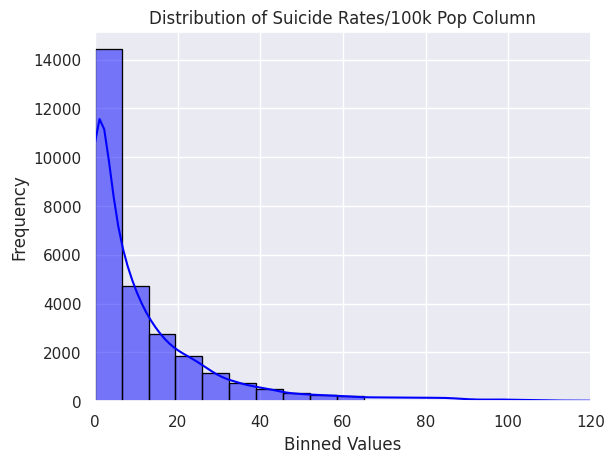

In [ ]:
# Distribution of 'suicide rate/100k pop' variable
from scipy.stats import gaussian_kde


df6=df.copy()

sns.histplot(df6['suicides/100k pop'], bins=10, kde=True, color='blue', edgecolor='black',binrange=(0,65))
plt.title('Distribution of Suicide Rates/100k Pop Column')
plt.xlabel('Binned Values')
plt.ylabel('Frequency')
plt.xlim(0, 120)
plt.show()



In [ ]:
# Finding mean of column

mean_s = (df6['suicides/100k pop'].mean())
print(f'Mean value of the suicides/100k pop variable is: {mean_s}')

Mean value of the suicides/100k pop variable is: 12.816097411933864


In [ ]:
# Creating a new variable
dv=[]
for i in range(len(df6)):
  if df6['suicides/100k pop'][i]>=mean_s:
    dv.append('High Suicide Rate')
  else:
    dv.append('Low Suicide Rate')


# Sanity check
len(dv)



27820

In [ ]:
# Add new column to pandas dataframe

df6['DV']=dv

#Sanity Check
df6.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,DV
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,Low Suicide Rate
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,Low Suicide Rate
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,Low Suicide Rate
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,Low Suicide Rate
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,Low Suicide Rate


**Question 4:** Find some strong correlations beetween the independent variables and the dependent variable you decided and use them to rank the independent variables.

**Answer**:

Since we want to find strong correlations between our indepdent and dependent variables, we can do this through scatter plots/bar plots on our original suicide/100k category. Although this is different than our binary dependent variable, correlation is a numeric relationship metric, so it makes sense to use our original variable. The plotted scatter plots and bar plots are below.

In [ ]:
# Plotting Bar Plots for Nominal Variables
# Print nominal variables
nominal=[]
for f in list(df.columns.values):
    if df[f].dtype == object:
      nominal.append(f)
print(nominal)



['country', 'sex', 'age', 'country-year', ' gdp_for_year ($) ', 'generation']


We can see that gdp for year is showing up as a nominal variable, but we need to change its variables to integers

In [ ]:

df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].str.replace(',', '').astype(int)
df6[' gdp_for_year ($) '] = df6[' gdp_for_year ($) '].str.replace(',', '').astype(int)



In [ ]:
# Plotting Bar Plots for Nominal Variables
# Print nominal variables
nominal=[]
for f in list(df.columns.values):
    if df[f].dtype == object:
      nominal.append(f)
print(nominal)

['country', 'sex', 'age', 'country-year', 'generation']


We fixed the variable's data type

Plotting Bar Plots for Nominal Variables


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


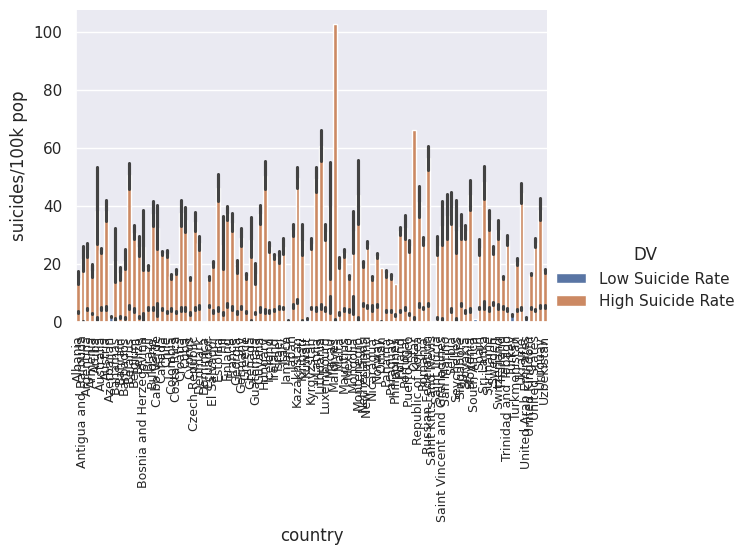

In [ ]:
# Country vs Suicide Rate
g = sns.FacetGrid(df6, hue='DV', height=4, aspect=1.5)
g.map(sns.barplot, 'country', 'suicides/100k pop')
g.set_xticklabels(rotation=90, fontsize=9)
g.add_legend();

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


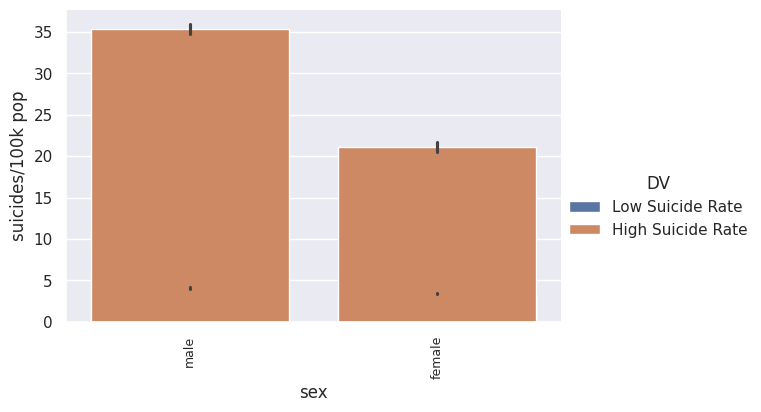

In [ ]:
# Sex vs Suicide Rate
g = sns.FacetGrid(df6, hue='DV', height=4, aspect=1.5)
g.map(sns.barplot, 'sex', 'suicides/100k pop')
g.set_xticklabels(rotation=90, fontsize=9)
g.add_legend();

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


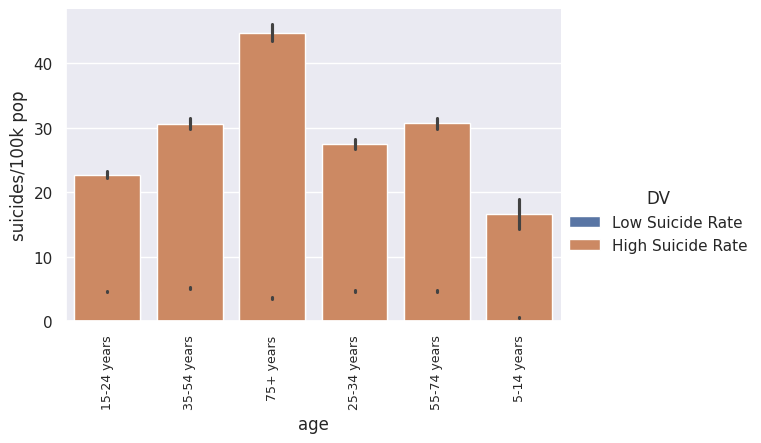

In [ ]:
# Age Group vs Suicide Rate
g = sns.FacetGrid(df6, hue='DV', height=4, aspect=1.5)
g.map(sns.barplot, 'age', 'suicides/100k pop')
g.set_xticklabels(rotation=90, fontsize=9)
g.add_legend();

Since country year and generation show redundant information (country/year, and age), it is unecessary to plot the correlation

Numerical Variables:

In [ ]:
numerical=[]
for f in list(df.columns.values):
    if df[f].dtype != object:
      numerical.append(f)
print(numerical)

['year', 'suicides_no', 'population', 'suicides/100k pop', 'HDI for year', ' gdp_for_year ($) ', 'gdp_per_capita ($)']


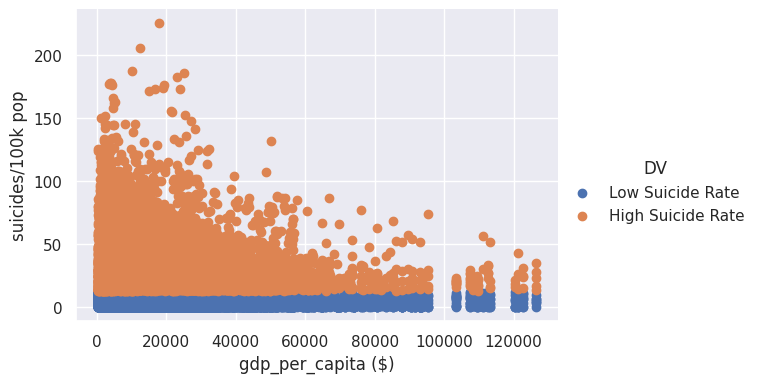

In [ ]:
g = sns.FacetGrid(df6, hue='DV', height=4, aspect=1.5)
g.map(plt.scatter, 'gdp_per_capita ($)', 'suicides/100k pop')
g.add_legend();

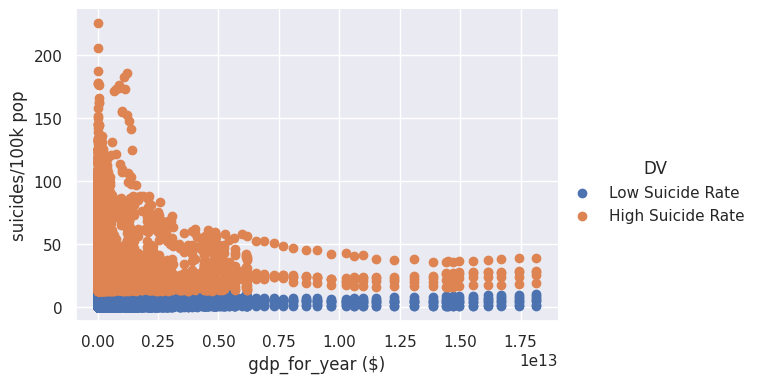

In [ ]:
g = sns.FacetGrid(df6, hue='DV', height=4, aspect=1.5)
g.map(plt.scatter, ' gdp_for_year ($) ', 'suicides/100k pop')
g.add_legend();

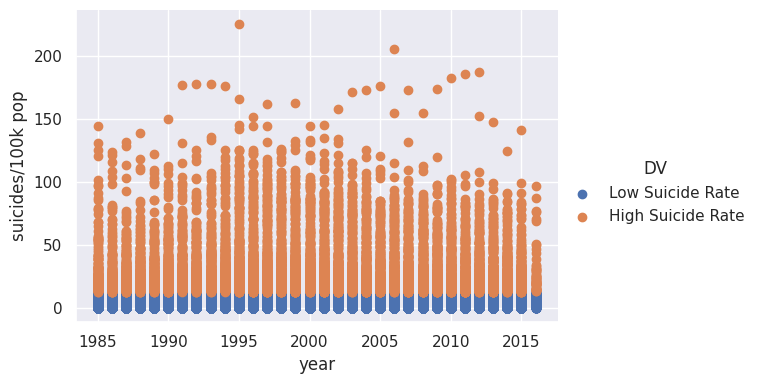

In [ ]:
g = sns.FacetGrid(df6, hue='DV', height=4, aspect=1.5)
g.map(plt.scatter, 'year', 'suicides/100k pop')
g.add_legend();

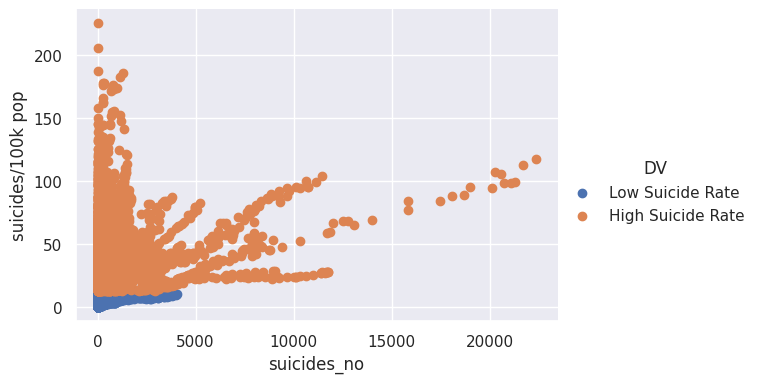

In [ ]:
g = sns.FacetGrid(df6, hue='DV', height=4, aspect=1.5)
g.map(plt.scatter, 'suicides_no', 'suicides/100k pop')
g.add_legend();

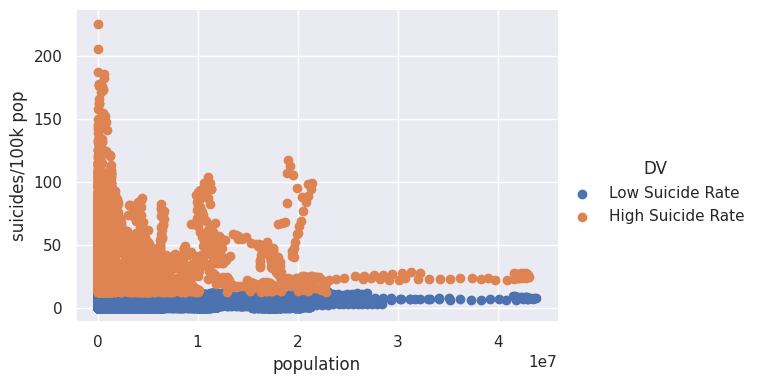

In [ ]:
g = sns.FacetGrid(df6, hue='DV', height=4, aspect=1.5)
g.map(plt.scatter, 'population', 'suicides/100k pop')
g.add_legend();

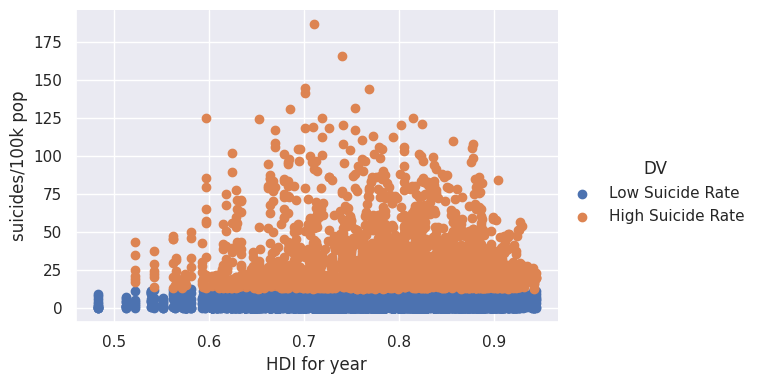

In [ ]:
g = sns.FacetGrid(df6, hue='DV', height=4, aspect=1.5)
g.map(plt.scatter, 'HDI for year', 'suicides/100k pop')
g.add_legend();

**Answer**:

Based on the barplots of the nominal values, it is extremely evident that age is highly correlated, suicide rates increase with the age group's increase. Additionally, country does not have much correlation with suicides/100k population, as all countries are standardized based on the rates. Most countries hover beyond 20 to 60, but there is no real correlation from country to country on why the suicide rate is the way it is. Male and female, does have a correlation, as there is an roughly 80% increase in suicide rates from the data from males compared to females.

Based on the scatterplots of the numerical variables, there is little to no correlation between HDI for year, year, and population when compared to suicides/100k population. On the other hand, GDP per capita, and GDP per year are both negatively correlated, while suicides is positively correlated in different directions. We can rank the indepdent variables based on pearson's correlation below.

In [ ]:
numerical_df = df6.select_dtypes(include='number')

numerical_df.corr()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.094529,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.430096,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.710697,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.025240,0.001785
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.305193,0.771228
gdp_for_year ($),0.094529,0.430096,0.710697,0.025240,0.305193,1.000000,0.303405
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.771228,0.303405,1.000000


There are all very low correlations between the numerical variables, but as seen in the scatter plots, GDP and GDP per capita, are positively correlated, while the rest have very little correlation  at all. Between per capita and gdp for year, GDP for year is 2 orders of magnitude greater than gdp per capita, so this variable can be kept.

Of the kept variables and the data above, we can formulate the following list in terms of correlation:


1.   Sex
2.   Age-group
3.  GDP for year

The rest of the variables show little to no correlation and will not help the machine learning model.



**Question 5**: Pre-process the dataset and list the major features you want to use. Note that not all featues are crucial. For example, country-year variable is a derived feature and for a classifier it would not be necessary to incldue the year, the country, and the country-year togehter. In fact, one must avoid adding a derived feature and the original at the same time. List the independent features you want to use.

Based on the list above, the four variables are the only ones we want to keep for our classification model, and the rest can be discarded, including the original 'Suicides/100k pop' variable.

In [ ]:
# Drop the unwanted variables and only keep the wanted ones

selected_columns=['sex','age','suicides_no',' gdp_for_year ($) ','DV']
X=df6[selected_columns]


print(X)

          sex          age  suicides_no   gdp_for_year ($)                 DV
0        male  15-24 years           21          2156624900  Low Suicide Rate
1        male  35-54 years           16          2156624900  Low Suicide Rate
2      female  15-24 years           14          2156624900  Low Suicide Rate
3        male    75+ years            1          2156624900  Low Suicide Rate
4        male  25-34 years            9          2156624900  Low Suicide Rate
...       ...          ...          ...                 ...               ...
27815  female  35-54 years          107         63067077179  Low Suicide Rate
27816  female    75+ years            9         63067077179  Low Suicide Rate
27817    male   5-14 years           60         63067077179  Low Suicide Rate
27818  female   5-14 years           44         63067077179  Low Suicide Rate
27819  female  55-74 years           21         63067077179  Low Suicide Rate

[27820 rows x 5 columns]


In [ ]:
X.head()

,sex,age,suicides_no,gdp_for_year ($),DV
0,male,15-24 years,21,2156624900,Low Suicide Rate
1,male,35-54 years,16,2156624900,Low Suicide Rate
2,female,15-24 years,14,2156624900,Low Suicide Rate
3,male,75+ years,1,2156624900,Low Suicide Rate
4,male,25-34 years,9,2156624900,Low Suicide Rate


In [ ]:
# Check for Duplicates


X["is_duplicate"]= X.duplicated()

print(f"#total= {len(X)}")
print(f"#duplicated= {len(X[X['is_duplicate']==True])}")


#total= 27820
#duplicated= 0


<ipython-input-208-54b8370cfa09>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["is_duplicate"]= X.duplicated()


No duplicates in the data

In [ ]:
X[' gdp_for_year ($) ']

0         2156624900
1         2156624900
2         2156624900
3         2156624900
4         2156624900
            ...     
27815    63067077179
27816    63067077179
27817    63067077179
27818    63067077179
27819    63067077179
Name:  gdp_for_year ($) , Length: 27820, dtype: int64

In [ ]:
# Do we have NaN in our dataset?
X.isnull().any()

sex                   False
age                   False
suicides_no           False
 gdp_for_year ($)     False
DV                    False
is_duplicate          False
dtype: bool

No missing values

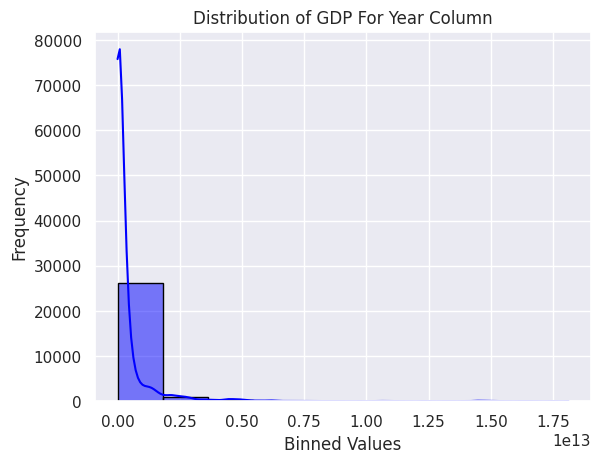

In [ ]:
# Numerical Outliers

# Distribution of 'suicide rate/100k pop' variable
from scipy.stats import gaussian_kde



sns.histplot(X[' gdp_for_year ($) '], bins=10, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of GDP For Year Column')
plt.xlabel('Binned Values')
plt.ylabel('Frequency')

plt.show()


We can get rid of the GDP For Year value greater than 0.50 *1e13, since they occur at a very low frequency

In [ ]:
gdp=X[' gdp_for_year ($) ']

gdp.nlargest(10).index

Int64Index([27208, 27209, 27210, 27211, 27212, 27213, 27214, 27215, 27216,
            27217],
           dtype='int64')

We can filter values greater than 1 trillion



In [ ]:
indices_greater = X[X[' gdp_for_year ($) '] > 10000000000000].index


In [ ]:
indices_greater

Int64Index([27028, 27029, 27030, 27031, 27032, 27033, 27034, 27035, 27036,
            27037,
            ...
            27210, 27211, 27212, 27213, 27214, 27215, 27216, 27217, 27218,
            27219],
           dtype='int64', length=192)

In [ ]:
X_dropped=X.drop(indices_greater)

print(len(X))
print(len(X_dropped))



27820
27628


In [ ]:
X_dropped = X_dropped.reset_index(drop=True)


Discretization

In [ ]:
# Professor created function
def encode_onehot(_df, _f):
    _df2 = pd.get_dummies(_df[_f], prefix=_f, prefix_sep=' - ', dtype=int)
    _df3 = pd.concat([_df, _df2], axis=1)
    _df3 = _df3.drop([_f], axis=1)
    return _df3

X_dropped=encode_onehot(X_dropped,'sex')
X_dropped=encode_onehot(X_dropped,'age')

print(X_dropped.columns)



Index(['suicides_no', ' gdp_for_year ($) ', 'DV', 'is_duplicate',
       'sex - female', 'sex - male', 'age - 15-24 years', 'age - 25-34 years',
       'age - 35-54 years', 'age - 5-14 years', 'age - 55-74 years',
       'age - 75+ years'],
      dtype='object')


In [ ]:
X_dropped.head()

,suicides_no,gdp_for_year ($),DV,is_duplicate,sex - female,sex - male,age - 15-24 years,age - 25-34 years,age - 35-54 years,age - 5-14 years,age - 55-74 years,age - 75+ years
0,21,2156624900,Low Suicide Rate,False,0,1,1,0,0,0,0,0
1,16,2156624900,Low Suicide Rate,False,0,1,0,0,1,0,0,0
2,14,2156624900,Low Suicide Rate,False,1,0,1,0,0,0,0,0
3,1,2156624900,Low Suicide Rate,False,0,1,0,0,0,0,0,1
4,9,2156624900,Low Suicide Rate,False,0,1,0,1,0,0,0,0


In [ ]:
y=X_dropped['DV']
X_dropped=X_dropped.drop('DV',axis=1)

X_dropped.head()

,suicides_no,gdp_for_year ($),is_duplicate,sex - female,sex - male,age - 15-24 years,age - 25-34 years,age - 35-54 years,age - 5-14 years,age - 55-74 years,age - 75+ years
0,21,2156624900,False,0,1,1,0,0,0,0,0
1,16,2156624900,False,0,1,0,0,1,0,0,0
2,14,2156624900,False,1,0,1,0,0,0,0,0
3,1,2156624900,False,0,1,0,0,0,0,0,1
4,9,2156624900,False,0,1,0,1,0,0,0,0


In [ ]:
X_dropped=X_dropped.drop('is_duplicate',axis=1)
X_dropped.head()

,suicides_no,gdp_for_year ($),sex - female,sex - male,age - 15-24 years,age - 25-34 years,age - 35-54 years,age - 5-14 years,age - 55-74 years,age - 75+ years
0,21,2156624900,0,1,1,0,0,0,0,0
1,16,2156624900,0,1,0,0,1,0,0,0
2,14,2156624900,1,0,1,0,0,0,0,0
3,1,2156624900,0,1,0,0,0,0,0,1
4,9,2156624900,0,1,0,1,0,0,0,0


In [ ]:
y

0        Low Suicide Rate
1        Low Suicide Rate
2        Low Suicide Rate
3        Low Suicide Rate
4        Low Suicide Rate
               ...       
27623    Low Suicide Rate
27624    Low Suicide Rate
27625    Low Suicide Rate
27626    Low Suicide Rate
27627    Low Suicide Rate
Name: DV, Length: 27628, dtype: object

**Question 6**: Device a classification problem and present a working prototype model. (It does not have to perform great, but it has to be functional). Note that we will continue with this problem in the following modules.

Low Suicide Rate     18949
High Suicide Rate     8679
Name: DV, dtype: int64

<Axes: title={'center': 'Class Imbalance of Dependent Variable'}, xlabel='Class'>

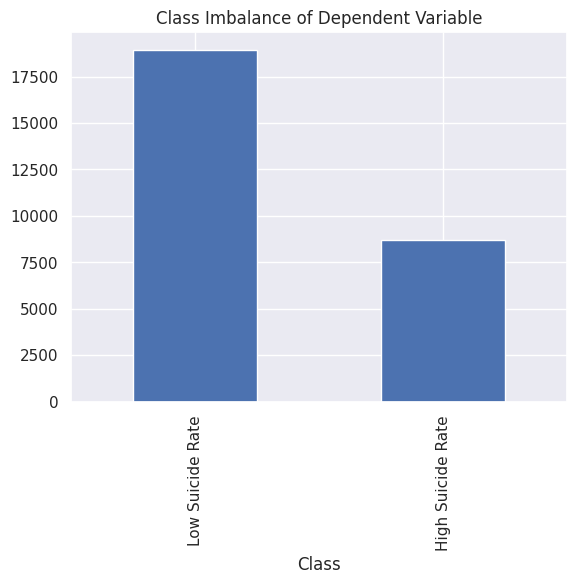

In [ ]:
# Check the class imbalance

display(y.value_counts())

y.value_counts().plot(kind='bar',xlabel='Class',title='Class Imbalance of Dependent Variable')

In [ ]:
y[:100]

0      Low Suicide Rate
1      Low Suicide Rate
2      Low Suicide Rate
3      Low Suicide Rate
4      Low Suicide Rate
            ...        
95     Low Suicide Rate
96    High Suicide Rate
97    High Suicide Rate
98     Low Suicide Rate
99     Low Suicide Rate
Name: DV, Length: 100, dtype: object

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score  # f1_score can be used too
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dropped, y, test_size=0.20, random_state=0)

rf = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=0, n_jobs=4)




In [ ]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)


In [ ]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.8523344191096635


In [ ]:
import statistics
for i in range(10):
  Accuracies = []
  X_train, X_test, y_train, y_test = train_test_split(X_dropped, y, test_size=0.20, random_state=i)
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)

  accuracy=accuracy_score(y_test,y_pred)
  Accuracies.append(accuracy)
  print(f'Accuracy: {accuracy}')
print(f'Average accuracy after 10 fold cross validation {statistics.mean(Accuracies)} ')



Accuracy: 0.8523344191096635
Accuracy: 0.8445530220774521
Accuracy: 0.8507057546145494
Accuracy: 0.8519724936663048
Accuracy: 0.8474484256243214
Accuracy: 0.8536011581614188
Accuracy: 0.8488961273977561
Accuracy: 0.8391241404270721
Accuracy: 0.8402099167571481
Accuracy: 0.8461816865725661
Average accuracy after 10 fold cross validation 0.8461816865725661 


After 10 runs with a random 80% training testing split, the average accuracy was 84.6% for the classification of low and high suicide rate